<h1>Abalone Dataset</h1>
In this notebook, the Abalone dataset has been processed using various machine learning operations under specific headings. These headings are as follows:<br>
1. Data Selection<br>
2. Data Understanding<br>
3. Preprocessing<br>
4. Baseline Model Building<br>
5. Model Evaluation

<h1>1. Data Selection</h1>

<img src="img/dataset.png" alt="dataset.png" width="800">
<p>Dataset: <a href="https://archive.ics.uci.edu/dataset/1/abalone">Abalone</a></p>

In [9]:
## Some of the libraries used.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
## Loading dataset from CSV file.
df = pd.read_csv("data/abalone_data.csv", names=["Sex","Length","Diameter","Height","Whole_Weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"])

<h1>2. Data Understanding</h1>

<h3>Dataset Information</h3>

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

<h3>Features</h3>

The dataset comprises 8 features, with 7 of them being continuous and 1 categorical.<br>
The value intended to be predicted after training is the integer type number of rings.

<img src="img/variable_table.png" alt="variable_table.png" width="800">

In [77]:
df.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<h3>Visualization of the Dataset in 2D to Understand Its Distribution and Relationships Between Features</h3>


C:\Users\Tarik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tarik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tarik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tarik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

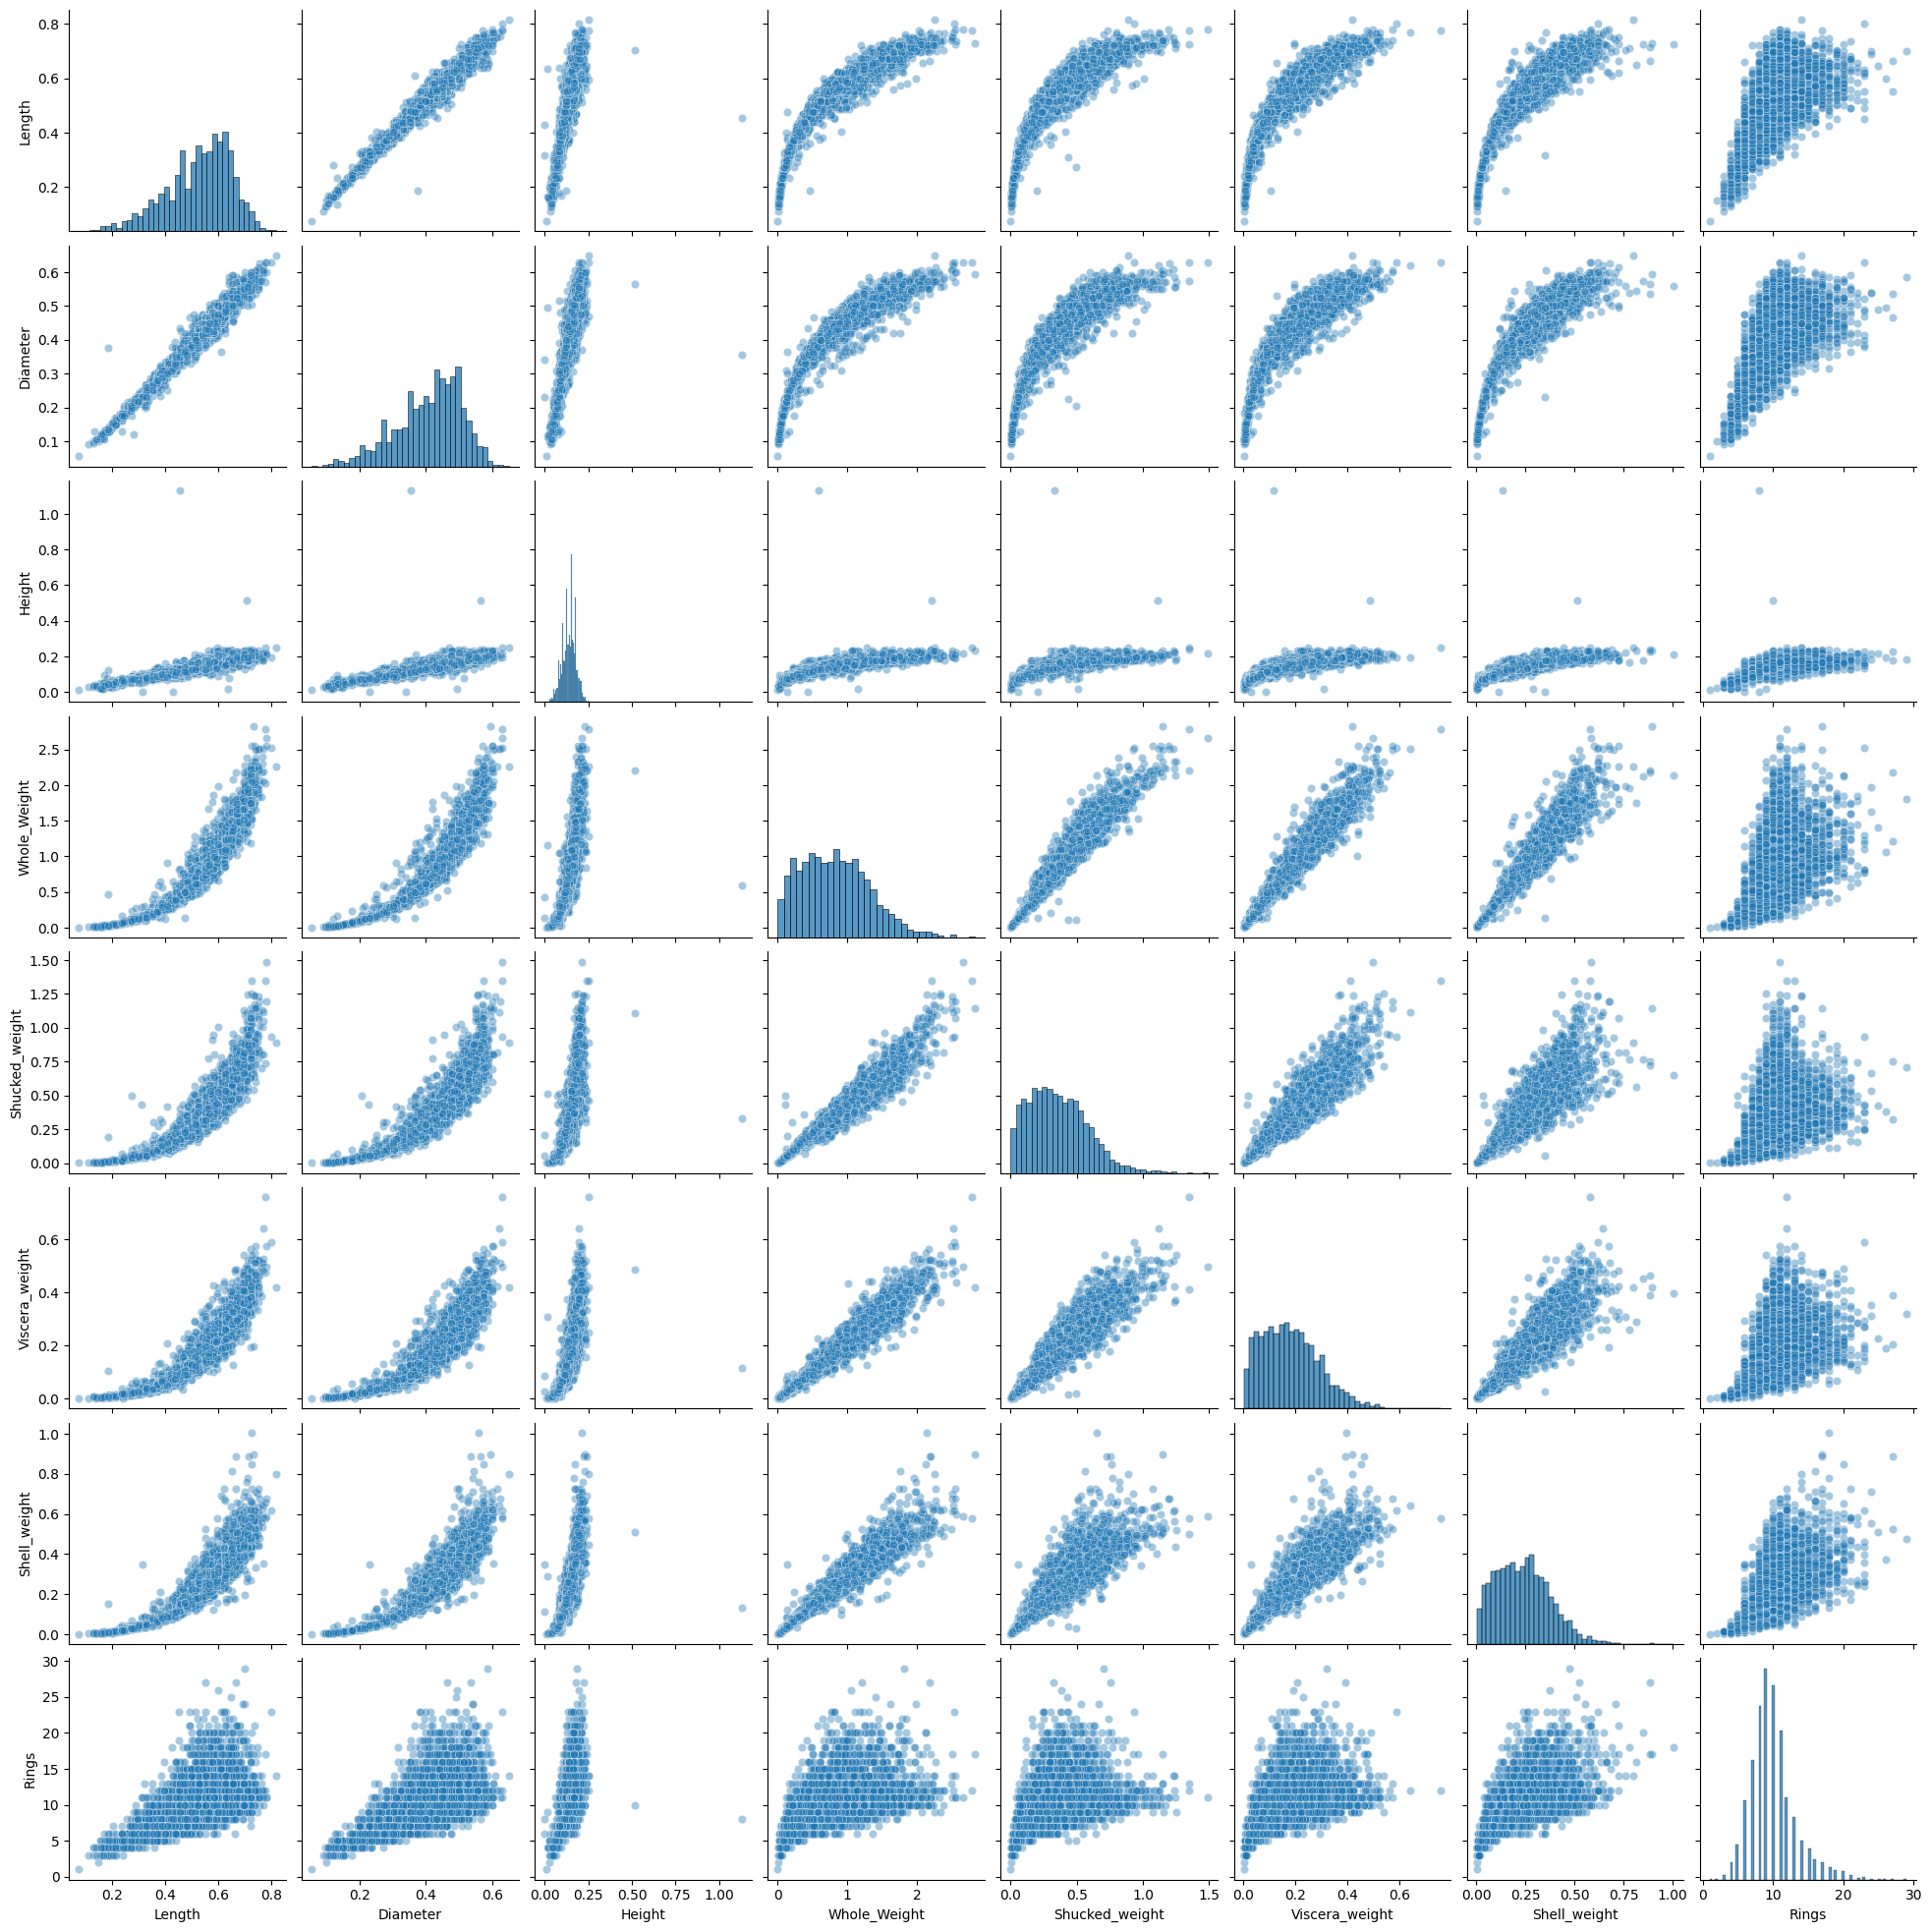

In [78]:
all_features = sns.pairplot(df,kind="scatter",plot_kws={"alpha":0.4})

<h1>3. Preprocessing</h1>

<h3>Handling Missing Values and Scaling Numerical Features</h3>

The dataset contains no missing values and numerical features are already scaled.
<em>"From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200)."</em>

<h3>Encoding Categorical Variables</h3>

In the encoding process, we focused on the 'Sex' variable, which is categorical and consists of values 'M' (male), 'F' (female), and 'I' (infant). To handle this categorical variables, we applied one-hot encoding, which transforms categorical variables into a binary format, creating separate binary columns for each category while dropping the "Sex" column.

In [79]:
df = pd.get_dummies(df, columns=["Sex"], dtype=int)

In [80]:
# After encoding
df.head()

,Length,Diameter,Height,Whole_Weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


<h1>4. Baseline Model Building</h1>

In [81]:
# The libraries used for model training.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

<h3>Before Model Training: Preparing the Data</h3>

The dataset is divided into a training set and a test set, which is done using the 'train_test_split' function. In this case, the test set size is determined by the 'test_size' parameter, which is set to 0.2, meaning that 20% of the data is allocated for testing while the remaining 80% is used for training. The training set is used for the model to learn, while the test set is employed to evaluate the performance of the trained model. Additionally, the 'random_state' parameter ensures reproducibility by randomly dividing the dataset.

In [82]:
X = df.drop(["Rings"],axis=1)
y = df["Rings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 10), (836, 10), (3341,), (836,))

These commands provide information about the shapes (dimensions) of the training and test sets for both the input features (X_train and X_test) and the target variable (y_train and y_test).

<h3>Model Training</h3>

<h5>Linear Regression</h5>

It is a simple and widely used regression model.     
It attempts to model the relationship between the dependent variable and the independent variables with a linear equation.

In [84]:
lm = LinearRegression()
lm.fit(X_train, y_train)
linear_y_predict = lm.predict(X_test)

In [85]:
## This output contains the coefficients indicating the importance of each feature in the linear regression model's prediction.
cdf = pd.DataFrame(lm.coef_,X.columns, columns=["Coef"])
cdf

,Coef
Length,-7.963950e-01
Diameter,1.103777e+01
Height,9.932428e+00
Whole_Weight,8.935267e+00
Shucked_weight,-1.961604e+01
Viscera_weight,-1.008897e+01
Shell_weight,8.874814e+00
Sex_F,6.220944e+13
Sex_I,6.220944e+13
Sex_M,6.220944e+13


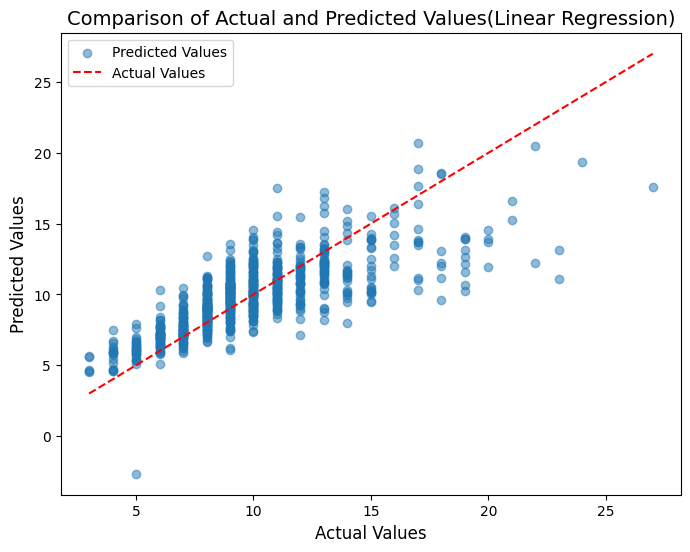

In [86]:
## Graphical representation of initial predictions for the linear regression model.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_y_predict, alpha=0.5, label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Comparison of Actual and Predicted Values(Linear Regression)', fontsize=14)
plt.legend()
plt.show()

<h5>Decision Trees</h5>

Decision trees are tree structures that make decisions based on the values of features in the dataset.     
They make predictions by recursively partitioning and classifying the dataset.

In [87]:
tree = DecisionTreeRegressor(random_state=30)
tree.fit(X_train, y_train)
tree_y_predict = tree.predict(X_test)

In [88]:
## This output showcases the importance scores assigned to each feature by the decision tree algorithm.
feature_importances_tree = tree.feature_importances_
feature_importance_df_tree = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances_tree})
feature_importance_df_tree = feature_importance_df_tree.sort_values(by="Importance", ascending=False)
feature_importance_df_tree

,Feature,Importance
6,Shell_weight,0.496158
4,Shucked_weight,0.153928
3,Whole_Weight,0.091646
5,Viscera_weight,0.070940
1,Diameter,0.060406
2,Height,0.057380
0,Length,0.035777
8,Sex_I,0.020771
7,Sex_F,0.007020
9,Sex_M,0.005973


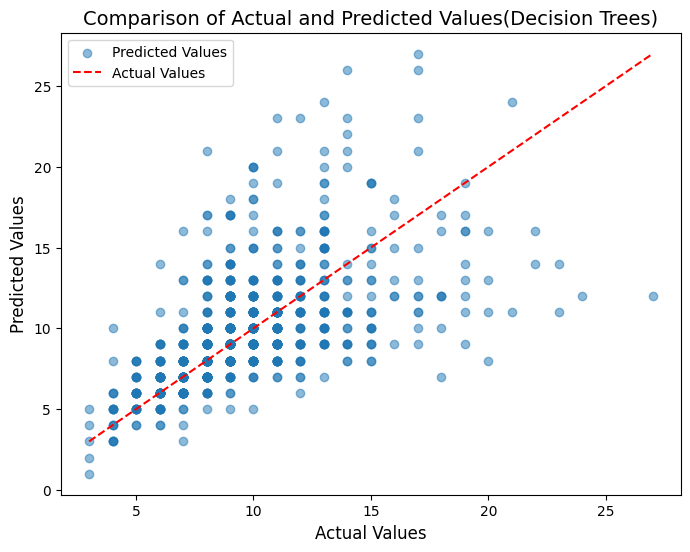

In [89]:
## Graphical representation of initial predictions for the decision trees model.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, tree_y_predict, alpha=0.5, label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Comparison of Actual and Predicted Values(Decision Trees)', fontsize=14)
plt.legend()
plt.show()

<h5>Random Forest</h5>

Random Forest combines multiple decision trees and aggregates their predictions to make a more accurate prediction.    
It is resistant to overfitting and generally performs well.     
In the model, 'n_estimators' represents the number of trees, and 'max_depth' represents the maximum depth of each decision tree.    

In [90]:
forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
forest.fit(X_train, y_train)
forest_y_predict = forest.predict(X_test)

In [91]:
## This output demonstrates the importance scores assigned to each feature by the random forest algorithm.
feature_importances_forest = forest.feature_importances_
feature_importance_df_forest = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances_forest})
feature_importance_df_forest = feature_importance_df_forest.sort_values(by="Importance", ascending=False)
feature_importance_df_forest

,Feature,Importance
6,Shell_weight,0.187676
4,Shucked_weight,0.153875
5,Viscera_weight,0.139945
3,Whole_Weight,0.139028
1,Diameter,0.114649
0,Length,0.108988
2,Height,0.102728
8,Sex_I,0.023340
9,Sex_M,0.016250
7,Sex_F,0.013521


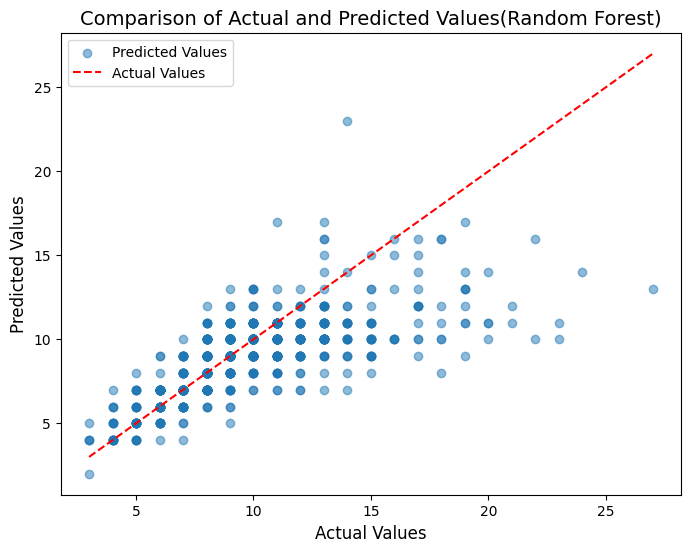

In [92]:
## Graphical representation of initial predictions for the random forest model.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, forest_y_predict, alpha=0.5, label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Comparison of Actual and Predicted Values(Random Forest)', fontsize=14)
plt.legend()
plt.show()

<h5>Elastic Net</h5>

ElasticNet is used to solve regression problems by combining L1 and L2 regularization.    
It combines the advantages of both Lasso (L1 regularization) and Ridge (L2 regularization) regression models.    
In the model, Alpha regulates the overall strength of regularization in ElasticNet where a higher value increases regularization, while l1_ratio controls the balance between L1 and L2 penalties.

In [93]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)
elastic_y_predict = elastic.predict(X_test)

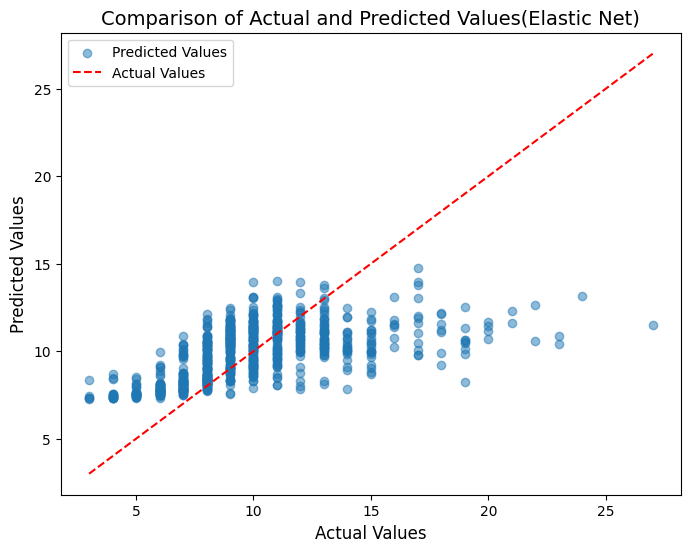

In [94]:
## Graphical representation of initial predictions for the Elastic Net model.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, elastic_y_predict, alpha=0.5, label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Comparison of Actual and Predicted Values(Elastic Net)', fontsize=14)
plt.legend()
plt.show()

<h5>Support Vector Regression</h5>

SVR is a model that adapts the support vector machine algorithm to regression problems.   
It ensures that data points are clustered within a margin around a hyperplane, reducing the risk of overfitting and improving generalization.   
The 'kernel' parameter in SVR specifies the kernel function used, with 'rbf' (radial basis function) being a commonly used kernel that allows capturing nonlinear relationships by transforming data points into a higher-dimensional space.

In [95]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
svr_y_predict = svr.predict(X_test)

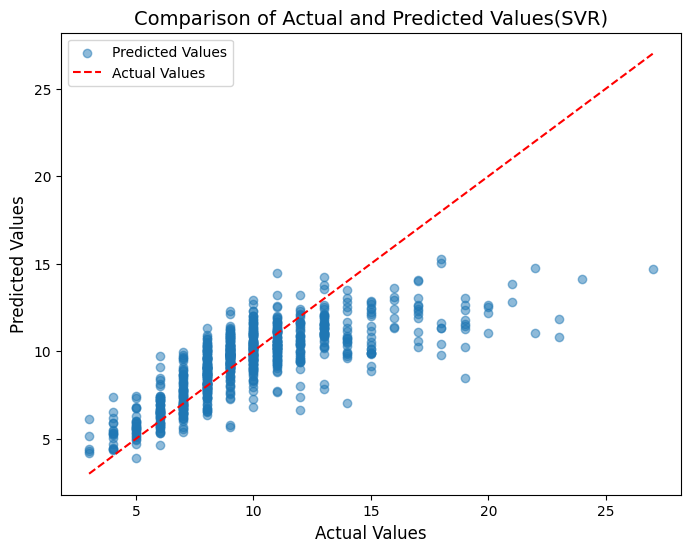

In [96]:
## Graphical representation of initial predictions for the SVR model.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_y_predict, alpha=0.5, label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Comparison of Actual and Predicted Values(SVR)', fontsize=14)
plt.legend()
plt.show()

<h1>5. Model Evaluation</h1>

In the model evaluation section, 4 metrics were used to measure and compare the performance of the models.   
**MAE** measures the average difference between actual and predicted values.    
**MSE** takes the average of these differences squared.    
**RMSE** is the square root of MSE. Low values for these three metrics indicate good model performance.    
**R-squared** explains the percentage of variance in the dependent variable explained by the independent variables. Its values can range from 0 to 1, with values closer to 1 indicating better fit.

In [97]:
## The libraries used for model evaluation.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [98]:
linear_mae = mean_absolute_error(y_test, linear_y_predict)
linear_mse = mean_squared_error(y_test, linear_y_predict)
linear_rmse = np.sqrt(linear_mae)
linear_r2 = r2_score(y_test, linear_y_predict)

In [99]:
tree_mae = mean_absolute_error(y_test, tree_y_predict)
tree_mse = mean_squared_error(y_test, tree_y_predict)
tree_rmse = np.sqrt(tree_mae)
tree_r2 = r2_score(y_test, tree_y_predict)

In [100]:
forest_mae = mean_absolute_error(y_test, forest_y_predict)
forest_mse = mean_squared_error(y_test, forest_y_predict)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, forest_y_predict)

In [101]:
elastic_mae = mean_absolute_error(y_test, elastic_y_predict)
elastic_mse = mean_squared_error(y_test, elastic_y_predict)
elastic_rmse = np.sqrt(elastic_mse)
elastic_r2 = r2_score(y_test, elastic_y_predict)

In [102]:
svr_mae = mean_absolute_error(y_test, svr_y_predict)
svr_mse = mean_squared_error(y_test, svr_y_predict)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_y_predict)

In [103]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'ElasticNet', 'SVR']
mae_scores = [linear_mae, tree_mae, forest_mae, elastic_mae, svr_mae]
mse_scores = [linear_mse, tree_mse, forest_mse, elastic_mse, svr_mse]
rmse_scores = [linear_rmse, tree_rmse, forest_rmse, elastic_rmse, svr_rmse ]
r2_scores = [linear_r2, tree_r2, forest_r2, elastic_r2, svr_r2]
data = {'Model': models,
        'MAE': mae_scores,
        'MSE': mse_scores,
        'RMSE': rmse_scores,
        'R-squared': r2_scores}
comparison = pd.DataFrame(data, index=range(1, len(models) + 1))

In [104]:
comparison

,Model,MAE,MSE,RMSE,R-squared
1,Linear Regression,1.522531,4.590314,1.233909,0.578940
2,Decision Tree,2.145933,10.100478,1.464900,0.073504
3,Random Forest,1.540670,6.000000,2.449490,0.449632
4,ElasticNet,1.962126,7.283963,2.698882,0.331857
5,SVR,1.494728,5.064383,2.250418,0.535454


According to the results, some differences in the performance of the models are observed. While the Linear Regression model shows quite good performance in terms of Mean Absolute Error (MAE), and the R-squared value is also at an acceptable level. However, the Decision Tree model performs lower compared to others, especially with a considerably low R-squared value. Random Forest and SVR models exhibit more balanced performance compared to the Decision Tree model, although the R-squared value of the ElasticNet model is lower. Overall, it is observed that the SVR model best fits the data, as it has the lowest MAE value and the highest R-squared value, indicating a better fit to the data.